In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout,MaxPooling2D,Dense,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


# **Loading  CIFAR-10 Dataset**

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


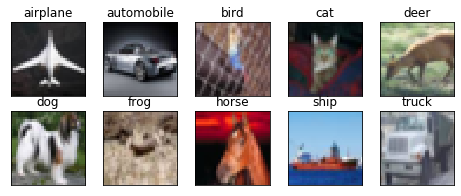

In [3]:
# Allocating the the label names to labels
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
# printing the images from CIFAR-10 along with its labels
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# **Function to Plot the model accuracy and loss**

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

# **Function to define the accuarcy of the model**

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

# **Standardizing the input features and also one hot encoding target values**

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# **Model from Assignment 6A**

In [7]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # input shape: 32X32X3  | (3X3X3)X64      | Output shape: 32X32X64   | RF: 3X3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same'))                          # input shape: 32X32X64 | (3X3X64)X64     | Output shape: 32X32X64   | RF: 5X5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))                                        # input shape: 32X32X64 | MP (2X2)        | Output shape: 16X16X64   | RF:10X10
model.add(Convolution2D(32, 1, 1, border_mode='same'))                          # input shape: 16X16X64 | (1X1X64)X32     | Output shape: 16X16X32   | RF:10X10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(64, 3, 3, border_mode='same'))                          # input shape: 16X16X32 | (3X3X32)X64     | Output shape: 16X16X64   | RF:12X12
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same'))                          # input shape: 16X16X64 | (3X3X64)X64     | Output shape: 16X16X64   | RF:14X14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))                                        # input shape: 16X16X64 | MP (2X2)        | Output shape: 8X8X64     | RF:28X28
model.add(Convolution2D(32, 1, 1, border_mode='same'))                          # input shape: 8X8X64   | (1X1X64)X32     | Output shape: 8X8X32     | RF:28X28
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3, 3, border_mode='same'))                         # input shape: 8X8X32   | (3X3X32)X128    | Output shape: 8X8X128    | RF:30X30
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Convolution2D(128, 3, 3, border_mode='same'))                         # input shape: 8X8X128  | (3X3X128)X128   | Output shape: 8X8X128    | RF:32X32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 1, 1, border_mode='same'))                          # input shape: 8X8X128   | MP(2X2)        | Output shape: 4X4X32     | RF:64X64
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))                             # input shape: 4X4X128   | Dense(10)      | Output shape: 10X1       | RF:64X64
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       

# **Using data geneartor to augment the CIFAR 10 data - by rotating and flipping to identify images in real world scenario. Also defining the learning rate**

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_features)
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
import keras.backend as K
import numpy as np
lmbda=0.01
# L2 Regularization
def reg_term(lmbda):
  w2=0
  for i in range(len(model.layers)):
    if len(model.layers[i].get_weights())>0:
      t=np.sum(model.layers[i].get_weights()[0]*model.layers[i].get_weights()[0])
      w2=w2*t
  w2=w2*(lmbda/(2*train_features.shape[0]))
  return w2
def l2_loss(y_true, y_pred):
  return K.categorical_crossentropy(y_true, y_pred)+reg_term(lmbda)
# Learning rate scheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
#fitting model and compiling the model
model.compile(optimizer=Adam(lr=0.003), loss=l2_loss, metrics=['accuracy'])

# **Integrating the GRADCAM code with model 6A**

In [0]:
import cv2

def get_gradcam_image(orig_std_image, model, layer_name):
  
  x = np.expand_dims(orig_std_image, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  conv_layer = model.get_layer(layer_name)


  grads = K.gradients(class_output, conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  
  no_of_channels = conv_layer.get_weights()[0].shape[-1]
  for i in range(no_of_channels):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 1e-7)
  heatmap /= np.max(heatmap)

 
  heatmap = cv2.resize(heatmap, (orig_std_image.shape[1], orig_std_image.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)



  orig_image= np.uint8(255 * (orig_std_image))

  superimposed_img = cv2.addWeighted(orig_image, 0.5, heatmap, 0.5, 0)
  return superimposed_img

# **Displaying GRADCAM results for 4 image ids**

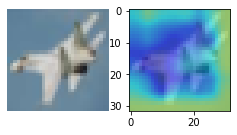

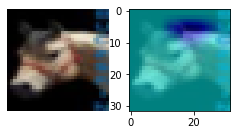

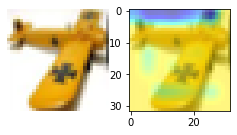

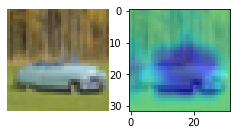

In [10]:

image_ids_display=[10,57,678,1021]
actual_labels = np.argmax(test_labels, axis=1)


for i in image_ids_display :
  test_image = test_features[i]
  superimposed_img = get_gradcam_image(test_image, model, "conv2d_7")

  fig=plt.figure(figsize=(4, 4))
  columns = 2
  rows = 1
  ax = fig.add_subplot(rows, columns, 1)
  ax.axis('off')
  plt.imshow(test_image)
  fig.add_subplot(rows, columns, 2)
  ax.axis('off')
  plt.imshow(superimposed_img)
  plt.show()

# **Using random eraser method for cutout**

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

# **Model with Cut Out Image Augmentation **

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`




Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 17s 44ms/step - loss: 2.2391 - acc: 0.1540 - val_loss: 2.4266 - val_acc: 0.1000
Epoch 2/50
390/390 [==============================] - 15s 38ms/step - loss: 1.8361 - acc: 0.3230 - val_loss: 2.7790 - val_acc: 0.1088
Epoch 3/50
390/390 [==============================] - 15s 39ms/step - loss: 1.6112 - acc: 0.4144 - val_loss: 2.8218 - val_acc: 0.1908
Epoch 4/50
390/390 [==============================] - 15s 39ms/step - loss: 1.5089 - acc: 0.4563 - val_loss: 3.4581 - val_acc: 0.1000
Epoch 5/50
390/390 [==============================] - 15s 39ms/step - loss: 1.4428 - acc: 0.4799 - val_loss: 1.7758 - val_acc: 0.3730
Epoch 6/50
390/390 [==============================] - 15s 38ms/step - loss: 1.3938 - acc: 0.5000 - val_loss: 1.7223 - val_acc: 0.4182
Epoch 7/50
390/390 [==============================] - 14s 37ms/step - loss: 1.3343 - acc: 0.5209 - val_loss: 1.4062 - val_acc: 0.4904
Epoch 8/50
390/390 [==============================] - 15s 39ms/step - los

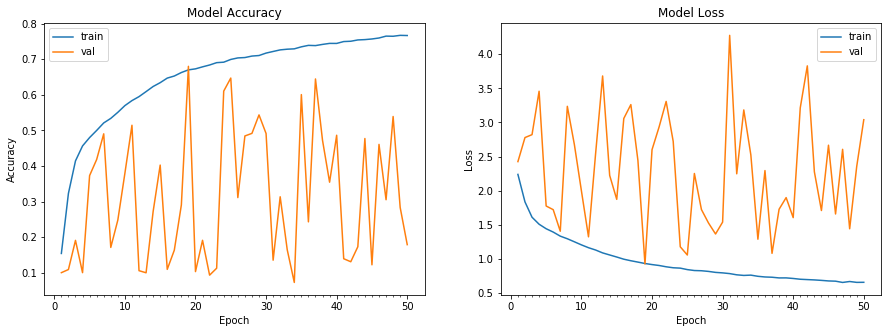

Accuracy on test data is: 17.88


In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint





datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,
                            preprocessing_function=get_random_eraser(p=0.60, s_l=0.07,
                                                                      pixel_level=False))



# train the model
start = time.time()
# Train the model

model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))



#**Applying gradCAM result on the same images with cutout image augmentation**

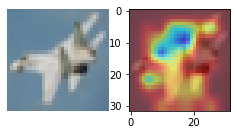

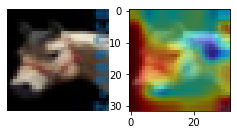

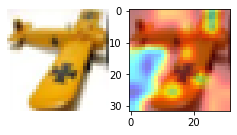

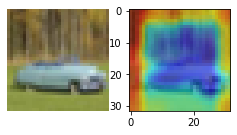

In [15]:
actual_labels = np.argmax(test_labels, axis=1)


for i in image_ids_display :
  test_image = test_features[i]
  superimposed_img = get_gradcam_image(test_image, model, "conv2d_7")

  fig=plt.figure(figsize=(4, 4))
  columns = 2
  rows = 1
  ax = fig.add_subplot(rows, columns, 1)
  ax.axis('off')
  plt.imshow(test_image)
  fig.add_subplot(rows, columns, 2)
  ax.axis('off')
  plt.imshow(superimposed_img)
  plt.show()